In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('precision',4)
pd.set_option('display.width',120)

titanic_df = pd.read_csv("./titanic_dataset/titanic_train.csv")

del titanic_df['Name']
#del titanic_df['PassengerId']
del titanic_df['Ticket']
del titanic_df['Cabin']
#titanic_df['Embarked_int'] = pd.Series([titanic_df['Embarked']=='S')


numsex = {"male":1 ,"female" :2}
titanic_df['Sex'] = titanic_df['Sex'].replace(numsex)
titanic_df['Sex'] = titanic_df['Sex'].convert_objects(convert_numeric=True)


numembark = {"S":1 ,"C" :2, "Q":3}
titanic_df['Embarked'] = titanic_df['Embarked'].replace(numembark)
titanic_df['Embarked'] = titanic_df['Embarked'].convert_objects(convert_numeric=True)
titanic_df['Embarked'].fillna(1)

titanic_df['Embarked'].fillna(titanic_df['Age'].mean())

titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.250,1
1,2,1,1,2,38,1,0,71.283,2
2,3,1,3,2,26,0,0,7.925,1
3,4,1,1,2,35,1,0,53.100,1
4,5,0,3,1,35,0,0,8.050,1


In [18]:
print(titanic_df.describe())

       PassengerId  Survived   Pclass      Sex      Age    SibSp    Parch     Fare  Embarked
count      891.000   891.000  891.000  891.000  714.000  891.000  891.000  891.000   889.000
mean       446.000     0.384    2.309    1.352   29.699    0.523    0.382   32.204     1.362
std        257.354     0.487    0.836    0.478   14.526    1.103    0.806   49.693     0.636
min          1.000     0.000    1.000    1.000    0.420    0.000    0.000    0.000     1.000
25%        223.500     0.000    2.000    1.000   20.125    0.000    0.000    7.910     1.000
50%        446.000     0.000    3.000    1.000   28.000    0.000    0.000   14.454     1.000
75%        668.500     1.000    3.000    2.000   38.000    1.000    0.000   31.000     2.000
max        891.000     1.000    3.000    2.000   80.000    8.000    6.000  512.329     3.000


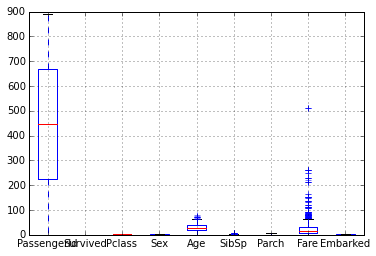

In [19]:
boxplots = titanic_df.boxplot(return_type='axes')

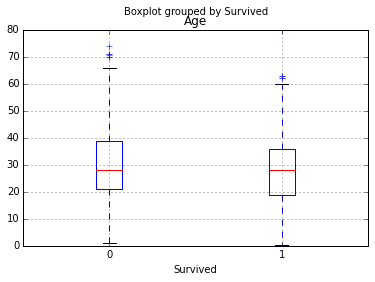

In [20]:
boxplots = titanic_df.boxplot(column='Age',by='Survived',return_type='axes')

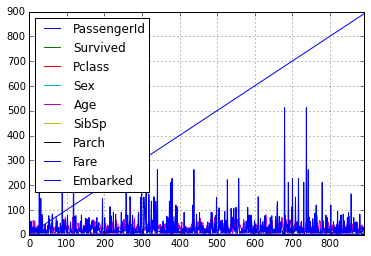

In [21]:
densityplot = titanic_df.plot() #kind='density'

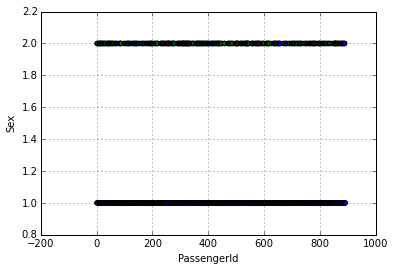

In [29]:
colors_palette = {0:"blue",1: "green"}
groups = list(titanic_df.Survived)
colors = [colors_palette[c] for c in groups]
simple_scatterplot = titanic_df.plot(kind='scatter',x=0,y=3,c=colors)

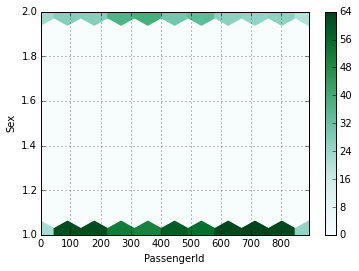

In [23]:
hexbin = titanic_df.plot(kind='hexbin',x=0,y=3,gridsize=10)

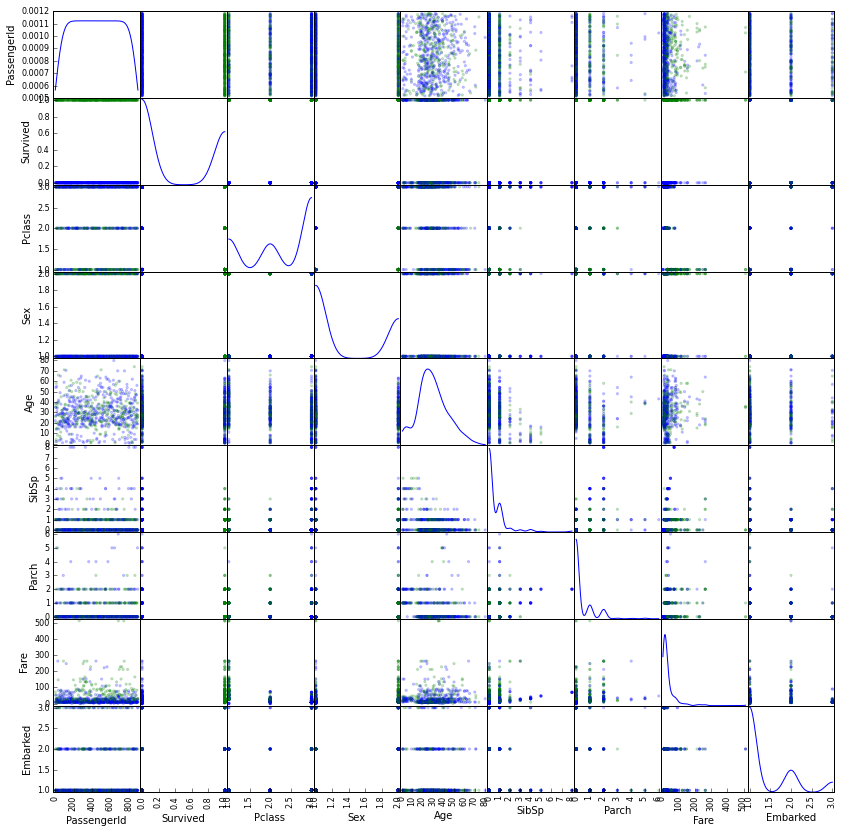

In [28]:
from pandas.tools.plotting import scatter_matrix
colors_palette = {0:"blue",1: "green"}
colors = [colors_palette[c] for c in groups]
matrix_of_scatterplots = scatter_matrix(titanic_df,alpha=0.2,figsize=(14,14),color=colors,diagonal='kde')

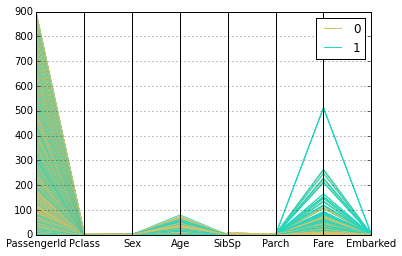

In [25]:
from pandas.tools.plotting import parallel_coordinates
pl1 = parallel_coordinates(titanic_df,'Survived')